In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.datasets import make_s_curve
from sklearn.linear_model import LinearRegression

In [81]:
x, y = make_regression(n_samples=20, n_features=1, random_state=6, noise=50, bias=100.0)
x_transform=[]
for i in range(0,len(x)):
    x_transform.append(x[i][0])

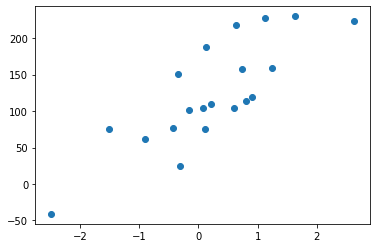

In [10]:
plt.scatter(x,y)

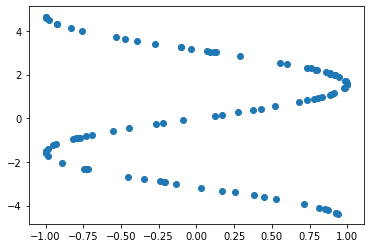

In [13]:
data, color= make_s_curve(100, random_state=6)
plt.scatter(data[:,0], color)

In [23]:
model=LinearRegression()
model.fit(x, y)
print(model.coef_)
print(model.intercept_)

[51.79603469]
111.65803223574108


In [30]:
predictions=model.predict(x)
print(y[2])
print(predictions[2])

61.50111018364299
65.088642352744


In [27]:
print(y)

[ 25.1660603  158.46790034  61.50111018 113.88680708 104.33340619
  75.99321968 150.2504787  -40.97845539 187.51418426  75.04710932
 110.10686532 217.40182735 101.73262577 229.98401368 222.84611614
 118.68831563 104.11048321  76.34104841 157.44893837 228.10179885]


In [82]:
pairlist=[]
for i in range(0,len(predictions)):
    pairlist.append(f"{x[i]},{predictions[i]}")

In [195]:
df=pd.DataFrame({"X": x_transform, "Y": y, "Predicted Y": predictions, "Error": predictions - y})[["X", "Y","Predicted Y", "Error"]]

In [196]:
df_range=["min y", y.min(), "max y", y.max(), "min x", x.min(), "max x", x.max(), "min error", df["Error"].min(), "max error", df["Error"].max()]
print(df_range)

['min y', -40.97845539478799, 'max y', 229.9840136770132, 'min x', -2.486780651627865, 'max x', 2.631280557263819, 'min error', -72.89343724256253, 'max error', 70.3428139661526]


In [197]:
len(x_transform)

20

In [198]:
gss=pd.read_csv("GSS_1996.csv", encoding="latin1")

In [199]:
#Clean the data
##drop cases with no answer, not asked, and don't know on the DV
badanswers=["NA","IAP","DK"]
for answer in badanswers:
    dropindex = gss[ (gss['chnang7'] == answer)].index
    gss.drop(dropindex , inplace=True)
##drop cases with null values on the DV
gss=gss[gss["chnang7"].notna()]

In [200]:
gss["chnang7"].unique()

array(['didnt', 'did'], dtype=object)

In [201]:
#Make DV a dummy variable called pray_anger
pray_anger=[]
for answer in gss["chnang7"]:
    if answer=="didnt":
        pray_anger.append(0)
    elif answer=="did":
        pray_anger.append(1)
    else:
        print("Value Error: Please recode data to omit all values that are not 'did' or 'didn't'")

In [202]:
#Reshape the DV for sklearn
DVpray_anger=np.array(pray_anger)
DVpray_anger.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [219]:
#Recode the IVs
###############
##Sex (to dummy variable)
sex=[]
for answer in gss["sex"]:
    if answer=="male":
        sex.append(0)
    elif answer=="female":
        sex.append(1)
    else:
        print("Sex Value Error")
##Race(To dummy variable)
race=[]
for answer in gss["race"]:
    if answer=="white":
        race.append(0)
    elif answer=="black":
        race.append(1)
    elif answer=="other":
        race.append(1)
    else:
        print("Race value error.")

In [220]:
race

[0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
